In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.colors import BoundaryNorm, ListedColormap
import sys 
sys.path.append('../../modules/')
import matplotlib_config as mconf 
colorI, colorII, colorIII = mconf.set_standard_layout() 

#### Notebook to create blueprints for figures 2A and 2B

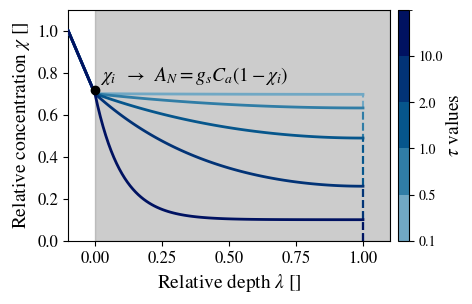

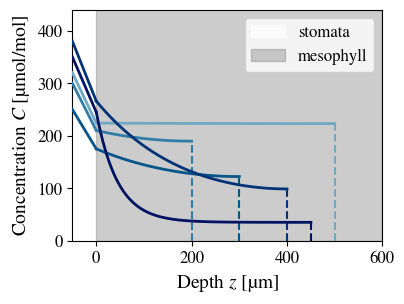

In [ ]:
# define dimensionless parameters
chi_ = 0.1 # relative CO2 compensation point
sigma = 2 # colimitation number gs/gm*
taus = np.array([0.1, 0.5, 1, 2, 10])
lambda_st = 0.1 # fractional epidermal layer thickness (typical value)

# define solutions according to Eqs. 2-6
chi = lambda x, tau: chi_ + (1-chi_)/(1 + 1/sigma)*(np.cosh(tau*(1-x)))/(np.cosh(tau))
chi_st = lambda x, tau: chi(0, tau) + (chi(0, tau) - 1)/lambda_st * x

# define domain lists
lambdas = np.linspace(0, 1, 100)
lambdas_st = np.linspace(-lambda_st, 0, 10)

# create plot of rescaled profiles (figure 2B)
fig, ax = plt.subplots(figsize=(5, 3))
colors = ['#001261', '#023376','#06568C', '#307DA6', '#71A8C4'][::-1]
stomata_color = 'white'
mesophyll_color = 'grey'

for tau, color in zip(taus, colors):
    chis = chi(lambdas, tau)
    ax.plot(lambdas_st, chi_st(lambdas_st, tau), color=color, linewidth=2, zorder=3)
    ax.plot(lambdas, chis, color=color,  linewidth=2, zorder=3)
    ax.plot([1, 1], [0, chis[-1]], color=color, linestyle='--')

ax.set_xlim(-lambda_st, 1.1)
ax.set_ylim(0, 1.1)
ax.set_xlabel(r'Relative depth $\lambda$ []')
ax.set_ylabel(r'Relative concentration $\chi$ []')
ax.fill_betweenx([0, 1.1], -lambda_st, 0, color=stomata_color, alpha=0.4, label='stomatal domain', zorder=0)
ax.fill_betweenx([0, 1.1], 0, 1.1, color=mesophyll_color, alpha=0.4, label='mesophyll domain', zorder=0)
ax.text(0.02, 0.76, r'$\chi_i \;\; \rightarrow \;\; A_N = g_s C_a(1-\chi_i) $', fontsize=14)
ax.plot(0, 0.72, 'ko', zorder=3)

# Make the colormap discrete using BoundaryNorm and a listed colormap
# Define discrete boundaries for each tau
bounds = np.append(taus, taus[-1] + (taus[-1] - taus[-2]))  # add an upper bound
# Create a discrete colormap using the same colors as used for the lines
discrete_cmap = ListedColormap(colors)
# Create a norm that maps values to the correct color bin
norm = BoundaryNorm(bounds, discrete_cmap.N)
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=discrete_cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, boundaries=bounds, ticks=taus)
cbar.set_label(r'$\tau$ values', labelpad=1)
cbar.ax.tick_params(labelsize=10)
# plt.savefig('../vectorgraphics/figure2B.svg')
plt.show()

#_____________________________________________________

# create show-case profiles in literature units (figure 2A)

L_st = 50 # stomatal domain thickness in µm
# solutions in literature units
C = lambda x, ca, L, tau : ca*chi_ + (ca - ca*chi_)/(1 + 1/sigma)*(np.cosh(tau*(1-x/L)))/(np.cosh(tau))
C_st = lambda x, ca, L, tau : C(0, ca, L, tau) + (C(0, ca, L, tau) - ca)/L_st * x

fig, ax = plt.subplots(figsize=(4, 3))

# helper function to plot the profiles
def plot(Ca, L, tau, color):
    z = np.linspace(0, L, 100)
    z_st = np.linspace(-L_st, 0, 10)
    ax.plot(z, C(z, Ca, L, tau), color=color, linewidth=2, zorder=3)
    ax.plot(z_st, C_st(z_st, Ca, L, tau), color=color, linewidth=2, zorder=3)
    ax.plot([L, L], [0, C(L, Ca, L, tau)], color=color, linestyle='--', zorder=3)

               # Ca   L
combinations = [(320, 500), 
                (300, 200), 
                (250, 300), 
                (380, 400), 
                (350, 450)]

# plot example profiles
for comb, tau, color in zip(combinations, taus, colors):
    plot(comb[0], comb[1], tau, color)

ax.set_xlim(-L_st, 600)
ax.set_ylim(0, 440)
ax.set_xlabel(r'Depth $z$ [µm]')
ax.set_ylabel(r'Concentration $C$ [µmol/mol]')
ax.fill_betweenx([0, 440], -L_st, 0, color=stomata_color, alpha=0.7, label='stomata', zorder=0)
ax.fill_betweenx([0, 440], 0, 600, color=mesophyll_color, alpha=0.4, label='mesophyll', zorder=0)
ax.legend(fontsize=12)
# plt.savefig('../vectorgraphics/figure2A.svg')
plt.show()

